In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler

from IPython.display import display
#sns.set()

In [2]:
data=data1 = pd.read_csv('leukemia_cancer_data_set.csv')
#data.describe(include= 'all')

In [3]:
#split dataset in features and target variable
feature_cols = ['Gender', 'Age', 'Weight(Kg)', 'Body Mass Index(BMI)','Systolic Blood Pressure','Diastolic Blood Pressure','Pulse','S.Total Cholesterol(TC)','S. Tryglycerides','LDL Cholesterol','HDL Cholesterol']

X=data.iloc[:,0:11]
y=data.iloc[:,-1]

fs_X = data1.iloc[:,2:11]
fs_y = data1.iloc[:,-1]
#results = {}

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(fs_X, fs_y, test_size=0.25,random_state=39) # 75% training and 25% test

In [5]:
#reduce imbalance factor of target attribute
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [6]:
#y_train_res.shape

(456,)

In [7]:
#y_train.shape

(300,)

In [8]:
#np.bincount(y_train)

array([ 72, 228], dtype=int64)

In [9]:
#np.bincount(y_train_res)

array([228, 228], dtype=int64)

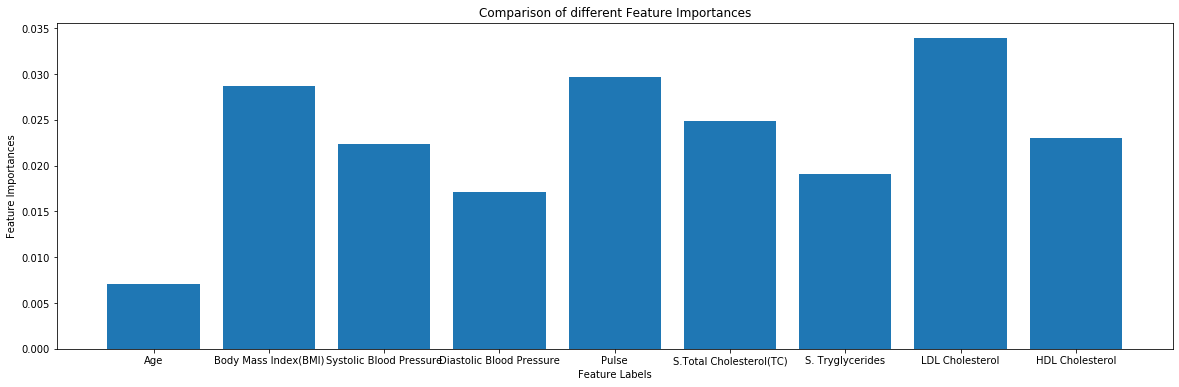

In [10]:
#Find the feature importance
from sklearn.ensemble import ExtraTreesClassifier 

# Building the model 
extra_tree_forest = ExtraTreesClassifier( n_estimators = 5,
                                        criterion ='entropy', max_features = 'auto') 

# Training the model 
extra_tree_forest.fit(fs_X, fs_y)

# Get numerical feature importances
importances = extra_tree_forest.feature_importances_

# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 

# Plotting a Bar Graph to compare the models 
plt.rcParams['figure.figsize'] = {20,6}
plt.bar(fs_X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [11]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier()
#columns_to_scale = ['Age', 'Weight(Kg)', 'Body Mass Index(BMI)','Systolic Blood Pressure','Diastolic Blood Pressure','Pulse','S.Total Cholesterol(TC)','S. Tryglycerides','LDL Cholesterol','HDL Cholesterol']
columns_to_scale = ['Age','Body Mass Index(BMI)','Systolic Blood Pressure','Diastolic Blood Pressure','Pulse','S.Total Cholesterol(TC)','S. Tryglycerides','LDL Cholesterol','HDL Cholesterol']
clf = DecisionTreeClassifier(criterion ="entropy", splitter = "best", max_depth=4,min_samples_leaf = 2)
# Train Decision Tree Classifer
#clf = clf.fit(X_train_res,y_train_res)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
#results['DecisionTreeClassifier_best_params'] =

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8415841584158416


In [12]:
confusion_matrix(y_test, y_pred)

array([[26,  2],
       [14, 59]], dtype=int64)

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  26
False Positives:  2
False Negatives:  14
True Positives:  59


In [14]:
precision_score(y_test, y_pred)

0.9672131147540983

In [15]:
recall_score(y_test, y_pred)

0.8082191780821918

In [16]:
f1_score(y_pred, y_test)

0.880597014925373

In [17]:
#function of tree rule generation
def tree_to_pseudo(tree, feature_names):                    

    '''
    Outputs a decision tree model as if/then pseudocode

    Parameters:

    tree: decision tree model
    The decision tree to represent as pseudocode
    feature_names: list
    The feature names of the dataset used for building the decision tree
    '''

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print (indent,"if(" + features[node] + " <= " + str(threshold[node]) + ") {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print( indent,"} else {" )
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print (indent,"}" )
        else:
            print (indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [18]:
tree_to_pseudo(clf, columns_to_scale)     # call the function

 if(S. Tryglycerides <= 151.5) {
   if(LDL Cholesterol <= 99.5) {
     if(Body Mass Index(BMI) <= 24.994999885559082) {
       if(Body Mass Index(BMI) <= 18.4350004196167) {
         return [[ 2. 19.]]
       } else {
         return [[69. 56.]]
       }
     } else {
       if(Age <= 46.5) {
         return [[ 0. 18.]]
       } else {
         return [[1. 2.]]
       }
     }
   } else {
     return [[ 0. 38.]]
   }
 } else {
   return [[ 0. 95.]]
 }


I:\Program\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


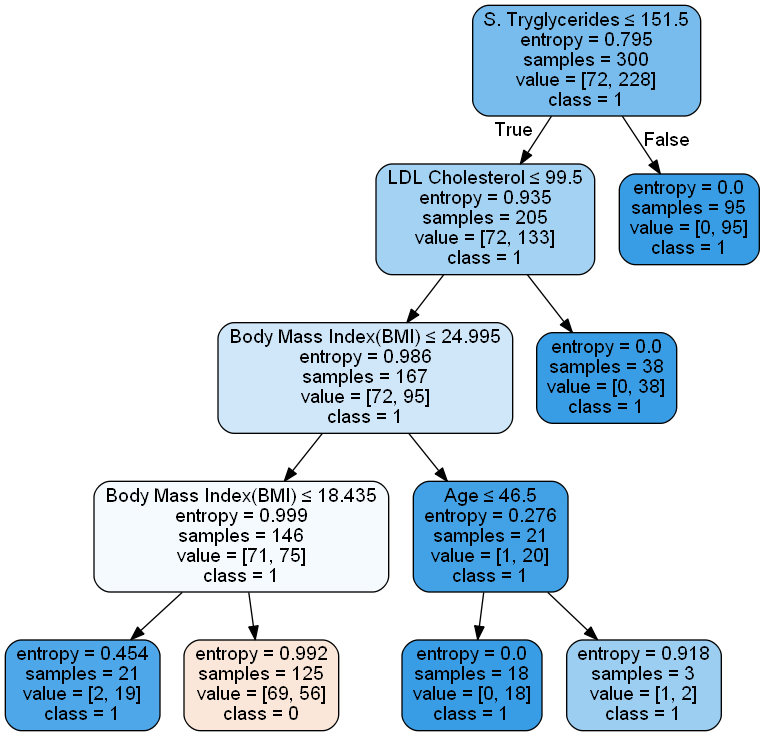

In [19]:
#Decision tree generation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#feature_column_final = ['Body Mass Index(BMI)','Age', 'Weight(Kg)','Systolic Blood Pressure','Diastolic Blood Pressure','Pulse','S.Total Cholesterol(TC)','S. Tryglycerides','LDL Cholesterol','HDL Cholesterol']
feature_column_final = ['Age','Body Mass Index(BMI)','Systolic Blood Pressure','Diastolic Blood Pressure','Pulse','S.Total Cholesterol(TC)','S. Tryglycerides','LDL Cholesterol','HDL Cholesterol']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_column_final,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('predict_tree_final.png')
Image(graph.create_png())

In [20]:
# random forest model creation
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=80)

rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)
#results['RandomForestClassifier_best_params'] =

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))

Accuracy: 0.7128712871287128


In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, rfc_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  7
False Positives:  21
False Negatives:  8
True Positives:  65


In [22]:
precision_score(y_test, rfc_predict)

0.7558139534883721

In [23]:
recall_score(y_test, rfc_predict)

0.8904109589041096

In [24]:
f1_score(rfc_predict, y_test)

0.8176100628930817

In [25]:
# Logistic regression model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg_predict=log_reg.predict(X_test)
#results['LogisticRegression_best_params'] =
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, log_reg_predict))

Accuracy: 0.7623762376237624


I:\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, log_reg_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  7
False Positives:  21
False Negatives:  3
True Positives:  70


In [27]:
precision_score(y_test, log_reg_predict)

0.7692307692307693

In [28]:
recall_score(y_test, log_reg_predict)

0.958904109589041

In [29]:
f1_score(log_reg_predict, y_test)

0.8536585365853658

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = clf.predict_proba(X_test)  #Predict probabilities for the test data
probs = probs[:, 1]  #Keep Probabilities of the positive class only

auc = roc_auc_score(y_test, probs)  #Compute the AUC Score
print('AUC: %.2f' % auc)

AUC: 0.88


In [33]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(clf) 
  
# Load the pickled model 
clf_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
predict = clf_from_pickle.predict(X_test)
metrics.accuracy_score(y_test, predict)

0.8415841584158416

In [34]:
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': clf,
},
{
    'label': 'Random Forest',
    'model': rfc,
},
{
    'label': 'Logistic Regression',
    'model': log_reg,
}
]

I:\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


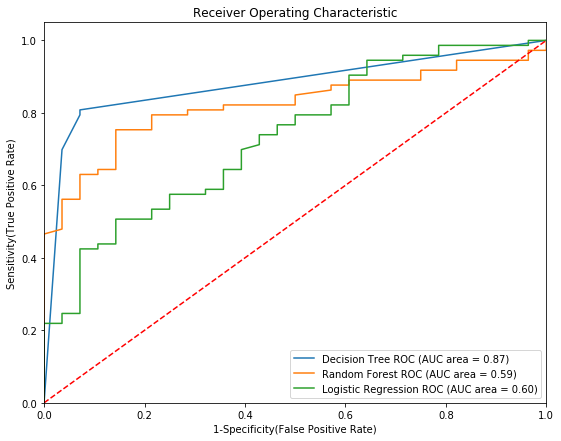

In [35]:
#Auc-Roc curve generation
plt.figure(figsize=(9,7))
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (AUC area = %0.2f)' % (m['label'], auc))
    
    # Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display